Cluster Centers: [[ 0.22054327 -0.35995228]
 [ 0.06480199 -0.93921658]]
Cluster Membership: [1 1 1 ... 0 0 0]


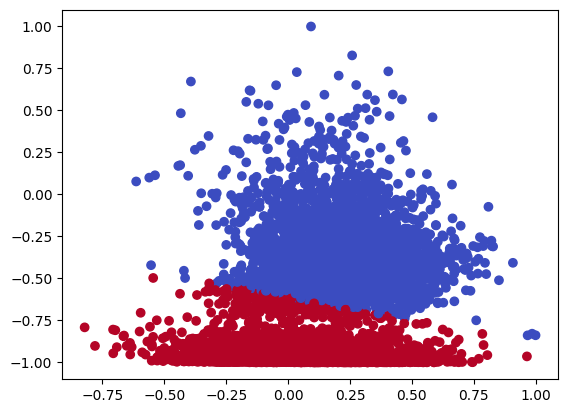

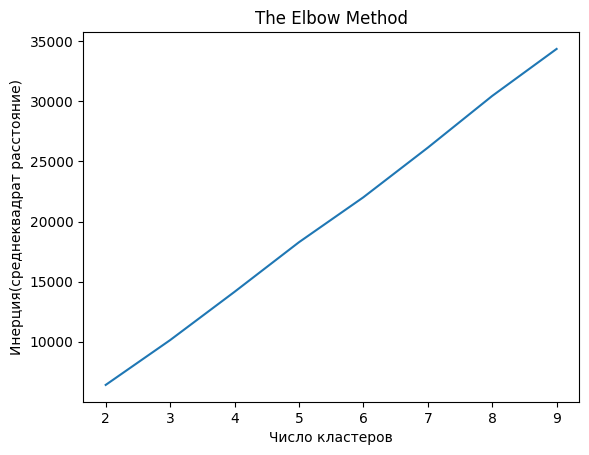

C:\Users\cfifz\AppData\Local\Temp\ipykernel_21016\2613630898.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, Silhouette_measure, 'bx-',color='green')


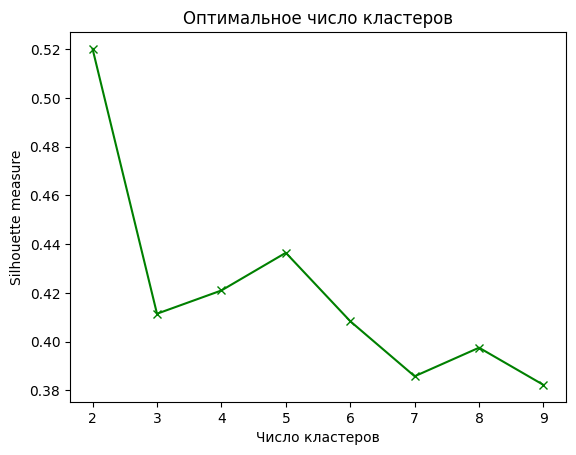

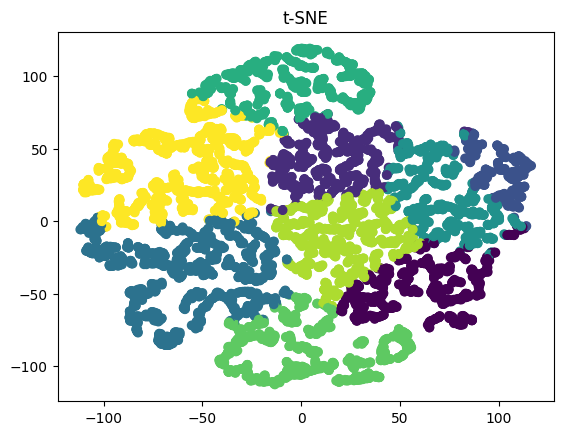

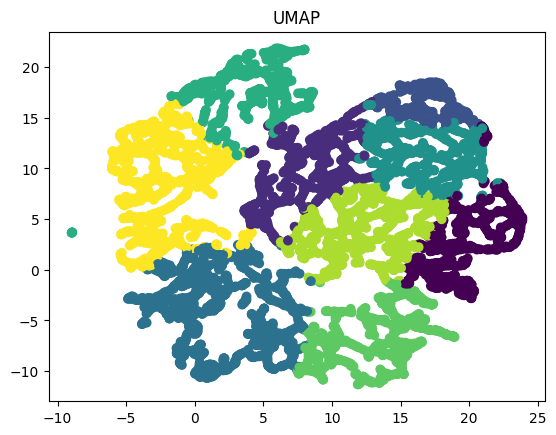

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


dataset=pd.read_csv('train.csv')
X = dataset.iloc[:, [28, 528]].values


n_clusters=2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, n_clusters,2, error=0.005, maxiter=1000, init=None)

clusters = np.argmax(u, axis=0)

# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

print('Cluster Centers:', cntr)
print('Cluster Membership:', cluster_membership)
plt.scatter(dataset.iloc[:, 28], dataset.iloc[:, 528], c=cluster_membership, cmap='coolwarm')
plt.show()
#inertia value
row_sum = np.sum(d, axis=1)
inertia_value = np.sum(row_sum)

wcss = []
for i in range(2, 10):
    n_clusters = i
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, n_clusters, 2, error=0.005, maxiter=100, init=None)
    clusters = np.argmax(u, axis=0)

    row_sum = np.sum(d, axis=1)
    inertia_value = np.sum(row_sum)
    cluster_membership = np.argmax(u, axis=0)
    wcss.append(inertia_value)


plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция(среднеквадрат расстояние)')
plt.show()

Silhouette_measure = []
K = range(2, 10)
for num_clusters in K:
    n_clusters = num_clusters
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, n_clusters, 2, error=0.005, maxiter=100, init=None)
    cluster_membership = np.argmax(u, axis=0)
    Silhouette_measure.append(silhouette_score(X, cluster_membership))
plt.plot(K, Silhouette_measure, 'bx-',color='green')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров')
plt.show()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(X)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_membership, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(X)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_membership, cmap='viridis')
plt.title('UMAP')
plt.show()